# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
table_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table_rows = table_soup.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
table_list = []

# Loop through the scraped data to create a list of rows
for row in table_rows:
    
    # Extracting all data points in a row
    all_row_data = row.find_all('td')
    all_row_data = [data_point.text for data_point in all_row_data]
         
    # Store data points in a dictionary
    row_dict = {"id": all_row_data[0],
                "terrestrial_date": all_row_data[1],
                "sol": all_row_data[2],
                "ls": all_row_data[3],
                "month": all_row_data[4],
                "min_temp": all_row_data[5],
               "pressure": all_row_data[6]} 
    
    # Add the dictionary to the list
    table_list.append(row_dict)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
table_df = pd.DataFrame(table_list)

In [8]:
# Confirm DataFrame was created successfully
table_df.head(10)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
table_df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [10]:
# Change data types for data analysis
table_df = table_df.astype({'sol': int,
                           'ls': int,
                           'month': int,
                           'min_temp': float,
                           'pressure': float})
table_df['terrestrial_date']= pd.to_datetime(table_df['terrestrial_date'])

In [11]:
# Confirm type changes were successful by examining data types again
table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(1)
memory usage: 80.3+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
num_months = len(table_df['month'].unique())
print(f"There are {num_months} months on Mars")

There are 12 months on Mars


In [13]:
# 2. How many Martian days' worth of data are there?
total_days = table_df['sol'].count()
print(f"There are {total_days} Martian days worth of data in the table")

There are 1867 Martian days worth of data in the table


In [14]:
# 3. What is the average low temperature by month?
avg_temp_by_month = table_df.groupby("month")["min_temp"].mean() 
avg_temp_df = avg_temp_by_month.reset_index() 
avg_temp_df

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


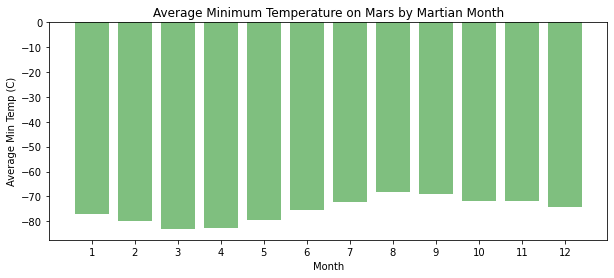

In [15]:
# Plot the average temperature by month

# chart size
plt.figure(figsize=(10,4))

# create chart

plt.bar(avg_temp_df['month'], avg_temp_df['min_temp'], 
        color='g', alpha=0.5, align="center")
# add chart labels
plt.xlabel("Month")   
plt.ylabel("Average Min Temp (C)")
plt.title("Average Minimum Temperature on Mars by Martian Month")

# adjust x values so all are showing
tick_locations = [value for value in avg_temp_df['month']]
plt.xticks(tick_locations, ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])

# show chart
plt.show()



In [16]:
# Identify the coldest and hottest months in Curiosity's location
avg_temp_df.sort_values("min_temp", ascending=False)

,month,min_temp
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143
10,11,-71.985507
6,7,-72.281690
11,12,-74.451807
5,6,-75.299320
0,1,-77.160920
4,5,-79.308725
1,2,-79.932584


* The hottest month is the 8th Martian month
* The coldest month is the 3rd Martian month

In [17]:
# 4. Average pressure by Martian month
avg_pres_by_month = table_df.groupby("month")["pressure"].mean() 
avg_pres_df = avg_pres_by_month.reset_index() 
avg_pres_df

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


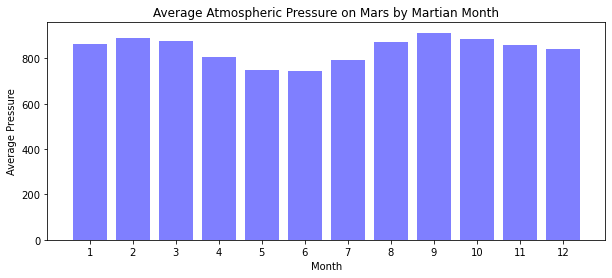

In [18]:
# Plot the average pressure by month

# chart size
plt.figure(figsize=(10,4))

# create chart

plt.bar(avg_pres_df['month'], avg_pres_df['pressure'], 
        color='b', alpha=0.5, align="center")
# add chart labels
plt.xlabel("Month")   
plt.ylabel("Average Pressure")
plt.title("Average Atmospheric Pressure on Mars by Martian Month")

# adjust x values so all are showing
tick_locations = [value for value in avg_pres_df['month']]
plt.xticks(tick_locations, ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])

# show chart
plt.show()

In [19]:
# finding the lowest and highest pressure months in Curiosity's location
avg_pres_df.sort_values("pressure", ascending=False)

,month,pressure
8,9,913.305970
1,2,889.455056
9,10,887.312500
2,3,877.322917
7,8,873.829787
0,1,862.488506
10,11,857.014493
11,12,842.156627
3,4,806.329897
6,7,795.105634


* The highest pressure month is the 9th Martian month
* The lowest pressure month is the 6th Martian month

 #### 5. How many terrestrial (earth) days are there in a Martian year?



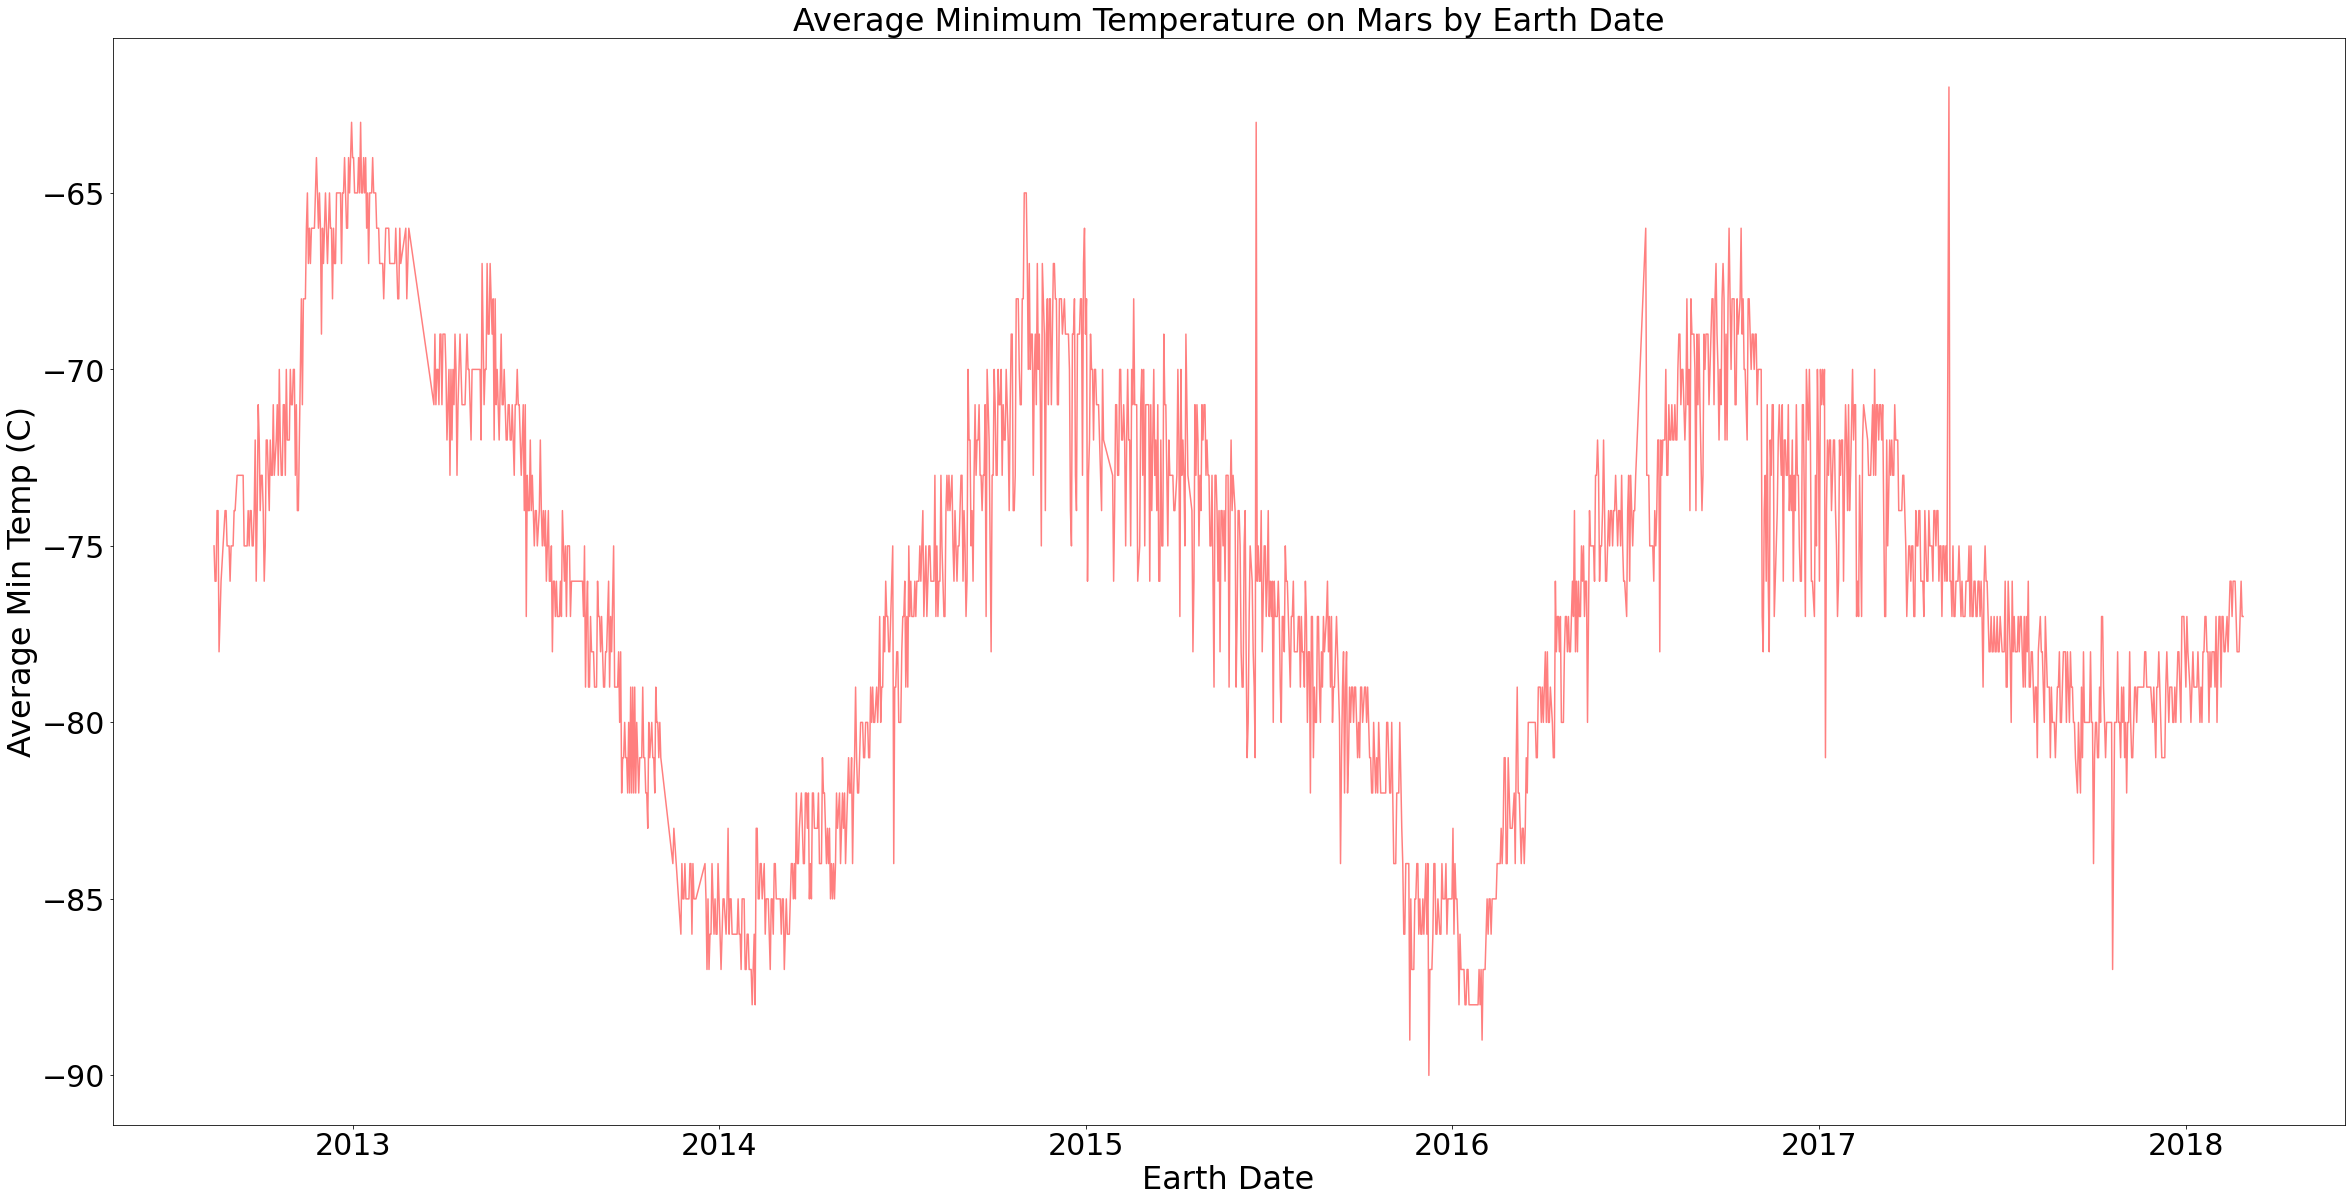

In [21]:
# Daily minimum temp 

# chart size
plt.figure(figsize=(40,20))

# create chart

plt.plot(table_df['terrestrial_date'], table_df['min_temp'], 
        color='r', alpha=0.5)
# add chart labels
plt.xlabel("Earth Date", fontsize=32)   
plt.ylabel("Average Min Temp (C)", fontsize=32)
plt.title("Average Minimum Temperature on Mars by Earth Date", fontsize=32)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# show chart
plt.show()

* From the plot it looks like there are less than two years from peak to peak of temp (so less than 708 earth days)

In [22]:
# Finding the two peaks
table_df.sort_values('min_temp', ascending=False).head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1582,1614,2017-05-10,1692,2,1,-62.0,820.0
926,938,2015-06-20,1020,0,1,-63.0,832.0
138,60,2013-01-09,152,241,9,-63.0,914.0
129,50,2012-12-31,143,235,8,-63.0,908.0
95,12,2012-11-26,109,213,8,-64.0,844.0


In [26]:
print("Based on the difference between the top temp peaks that are roughly two earth years apart,")
print(f"there are about {1692-1020} days in a Martian year")

Based on the difference between the top temp peaks that are roughly two earth years apart,
there are about 672 days in a Martian year


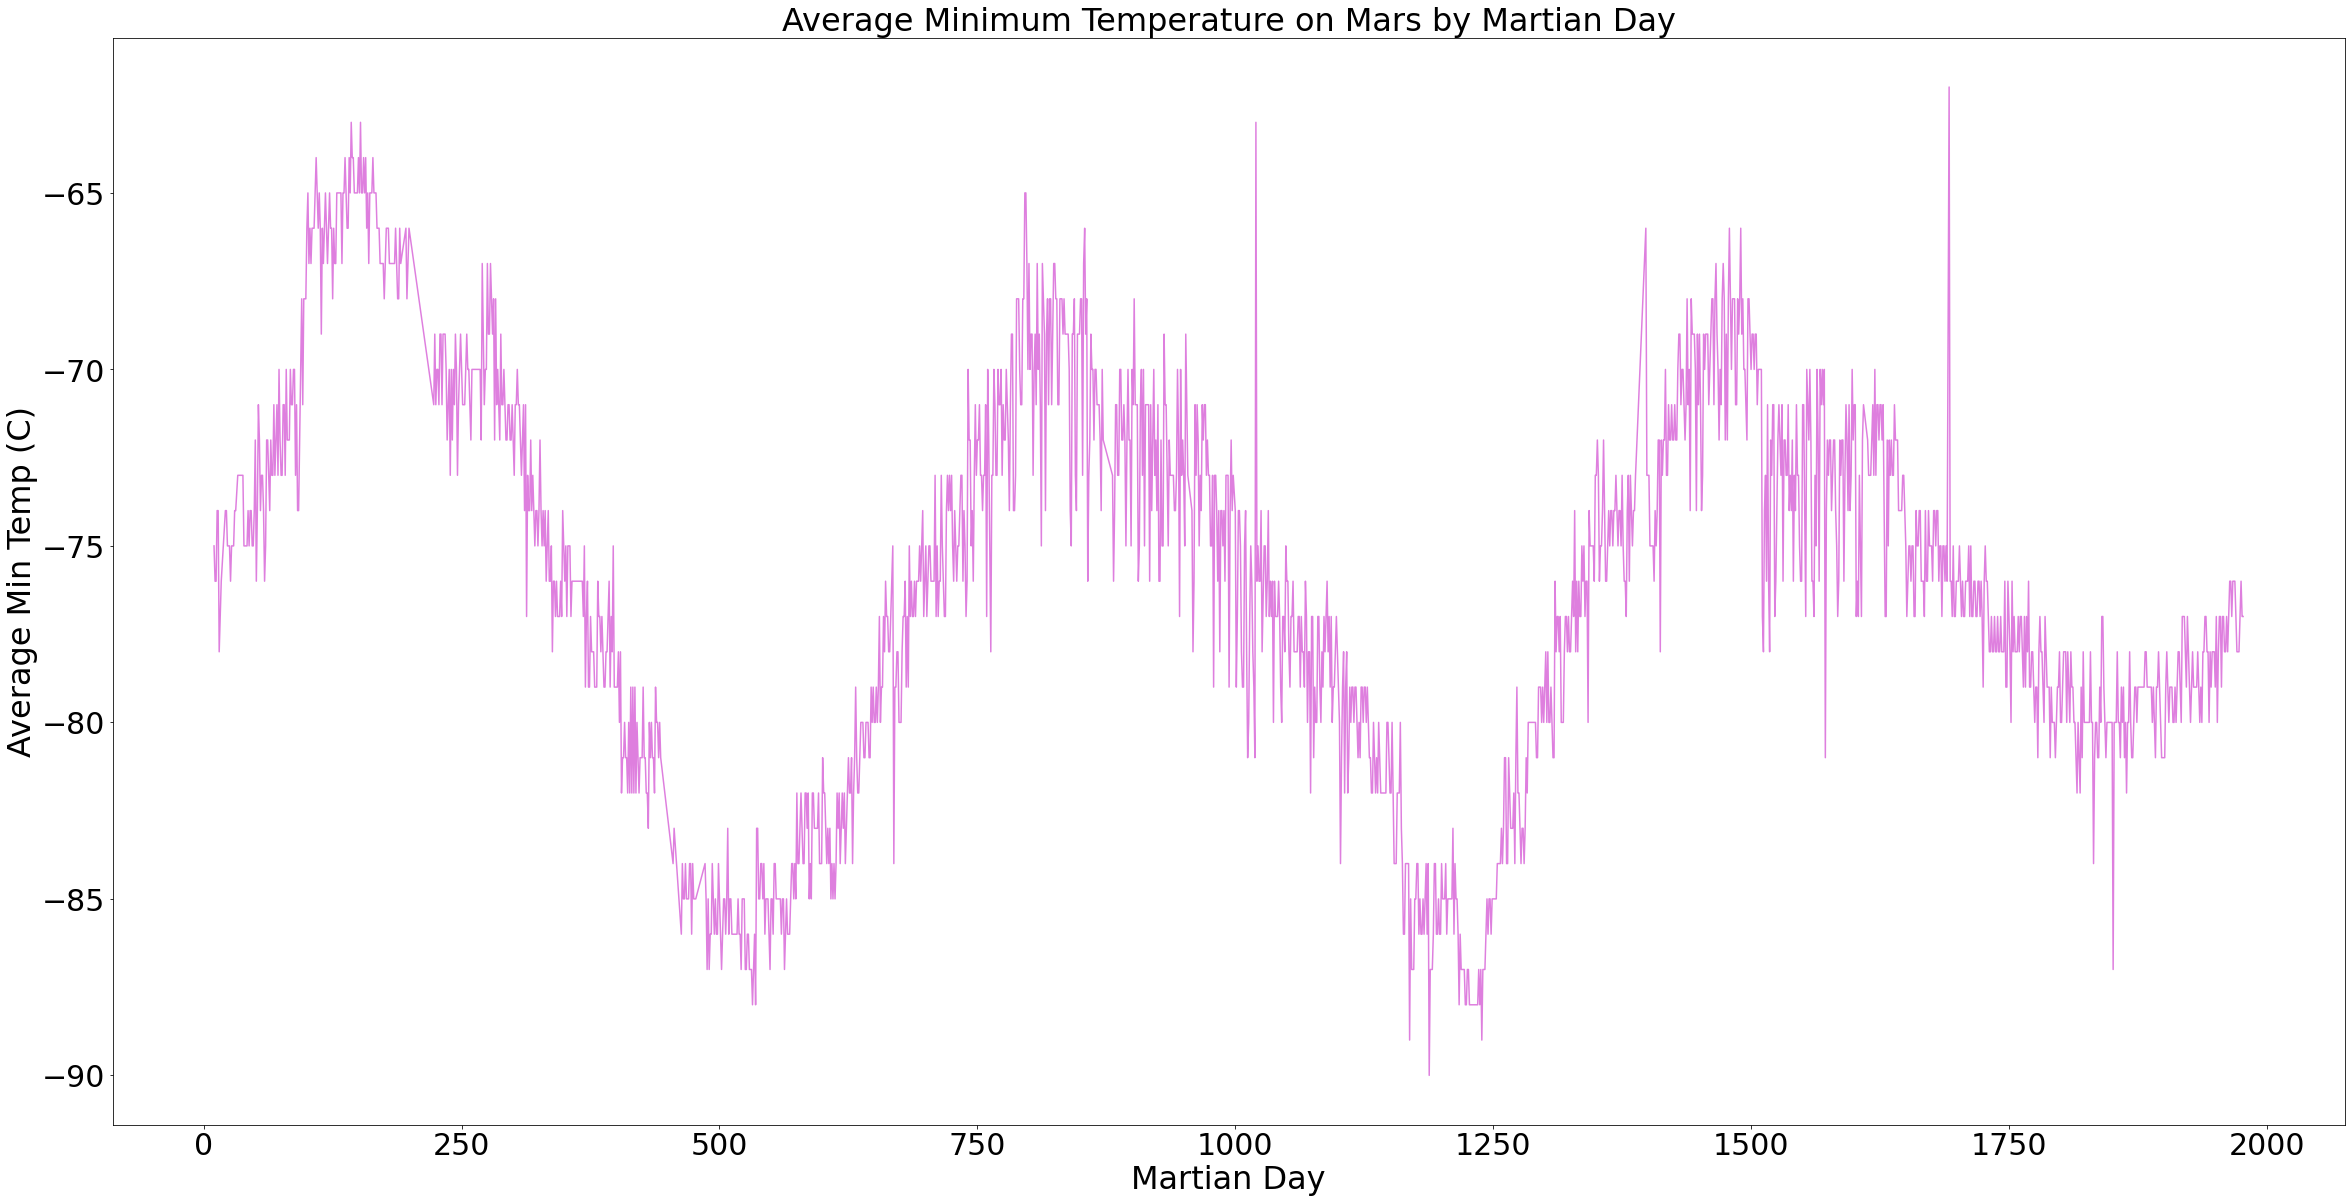

In [27]:
# Daily minimum temp 

# chart size
plt.figure(figsize=(40,20))

# create chart

plt.plot(table_df['sol'], table_df['min_temp'], 
        color='m', alpha=0.5)
# add chart labels
plt.xlabel("Martian Day", fontsize=32)   
plt.ylabel("Average Min Temp (C)", fontsize=32)
plt.title("Average Minimum Temperature on Mars by Martian Day", fontsize=32)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# show chart
plt.show()

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [28]:
# Write the data to a CSV
table_df.to_csv('mars_weather_data.csv', index=False)

In [29]:
browser.quit()